# Estrutura de Dados — Árvores

Capítulos 6.1, 10.4, 12, 13 e 18 do livro texto sugerido: Introduction to Algorithms, Fourth Edition By Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest and Clifford Stein https://mitpress.mit.edu/9780262046305/introduction-to-algorithms/

## Aviso

Recomenda-se olhar este caderno através do Google Colab, que não renderiza a saída em HTML do exemplo ao final.

https://colab.research.google.com/github/Gabrielcarvfer/Estrutura-de-dados-UnB/blob/master/08_arvores.ipynb

## Conteúdo

Árvores são estruturas de dados hierárquicas, organizada a partir de uma raiz, da qual se ramificam nós.

Estes nós formam galhos. Quando um nó está na ponta da árvore, é chamado folha.

[![](https://mermaid.ink/img/pako:eNplkEFqwzAQRa9iZu1A46RZaBFIyDbZtLsqhEEaxwJLChOZ0oacqkfoxSJLdgytBsTw__t_MTdQXhMIqFv_qRrkIF0RnzZMKhjvivdtVhjN98fh96d4EWk_TvJstnZ-nsz5X7lKcjXIEcvwKeMLUdS-bfCZm4AcXI7A1FDl3qHhdQQW_4DcsBqB5QCMfz9QgiW2aHQ8wa13JISGLEkQcW3NuQkSymxYw-x5o4Lna-_X2F5JunsswS74ty-nQATuqITuojHQzuCZ0YJIZAmkTczu88HT3e8PY9R75w?type=png)](https://mermaid.live/edit#pako:eNplkEFqwzAQRa9iZu1A46RZaBFIyDbZtLsqhEEaxwJLChOZ0oacqkfoxSJLdgytBsTw__t_MTdQXhMIqFv_qRrkIF0RnzZMKhjvivdtVhjN98fh96d4EWk_TvJstnZ-nsz5X7lKcjXIEcvwKeMLUdS-bfCZm4AcXI7A1FDl3qHhdQQW_4DcsBqB5QCMfz9QgiW2aHQ8wa13JISGLEkQcW3NuQkSymxYw-x5o4Lna-_X2F5JunsswS74ty-nQATuqITuojHQzuCZ0YJIZAmkTczu88HT3e8PY9R75w)

Árvores são tipicamente implementadas a partir da composição de nós.

Veremos a seguir árvores binárias, onde cada nó tem até dois nós filhos.

### Árvores binárias desbalanceadas

In [37]:
class ElementoArvoreBinaria: # nó
    def __init__(self, valor, pai=None, filho_esquerdo=None, filho_direito=None):
        self.valor = valor
        self.pai = pai
        self.filho_esquerdo = filho_esquerdo
        self.filho_direito = filho_direito

class ArvoreBinariaDesbalanceada:
    def __init__(self, raiz: ElementoArvoreBinaria = None):
        self.raiz = raiz

    # Nomes não iniciados com underline são públicos
    # Objetivo é ser chamado tanto por objetos de mesma classe ou por de outras classes
    def insere_valor(self, valor):
        # Cria nó raiz caso não exista
        if self.raiz is None:
            self.raiz = ElementoArvoreBinaria(valor)
        # Ou procura uma posição livre para adicionar o valor
        else:
            self._insere_valor_recursivo(self.raiz, valor)

    # Nomes de variáveis e métodos iniciados com underline são "escondidos"/privados
    # Objetivo é só ser chamado pelos objetos da mesma classe
    def _insere_valor_recursivo(self, no_atual: ElementoArvoreBinaria, valor):
        # Sempre inserimos os valores na ordem crescente
        # Significa que se o valor for menor que o nó atual,
        #  tentaremos colocar o valor no seu filho esquerdo
        if valor < no_atual.valor:
            # Se o filho esquerdo ainda não existe, cria ele com o valor e termina
            if no_atual.filho_esquerdo is None:
                no_atual.filho_esquerdo = ElementoArvoreBinaria(valor, pai=no_atual)
            else:
                # Se o filho esquerdo existe, continua recursivamente
                self._insere_valor_recursivo(no_atual.filho_esquerdo, valor)
        # Se o valor for maior que o nó atual,
        # devemos olhar no filho esquerdo do nó atual
        elif valor > no_atual.valor:
            # Se o filho direito ainda não existe, cria ele com o valor e termina
            if no_atual.filho_direito is None:
                no_atual.filho_direito = ElementoArvoreBinaria(valor, pai=no_atual)
            else:
                # Se o filho esquerdo existe, continua recursivamente
                self._insere_valor_recursivo(no_atual.filho_direito, valor)
        else:
            print(f"Nó com valor {valor} já existe na árvore")

# Biblioteca externa que permite imprimir as árvores
from print_tree import print_tree

class ImprimeArvoreDesbalanceada(print_tree):
    # Métodos necessários para imprimir a árvore print_tree
    def get_children(self, node):
        if type(node) == ArvoreBinariaDesbalanceada:
            node = node.raiz
        filhos = []
        # Pega filhos apenas se não forem nulos
        for filho in [node.filho_esquerdo, node.filho_direito]:
            if filho:
                filhos.append(filho)
        return filhos
    def get_node_str(self, node):
        if type(node) == ArvoreBinariaDesbalanceada:
            node = node.raiz
        return str(node.valor)

arvore = ArvoreBinariaDesbalanceada()
arvore.insere_valor(5)
arvore.insere_valor(4)
arvore.insere_valor(4)
arvore.insere_valor(6)
arvore.insere_valor(1)
arvore.insere_valor(2)
arvore.insere_valor(3)
arvore.insere_valor(9)
arvore.insere_valor(8)
arvore.insere_valor(7)
arvore.insere_valor(10)
arvore.insere_valor(12)
arvore.insere_valor(11)

ImprimeArvoreDesbalanceada(arvore)

Nó com valor 4 já existe na árvore

 ┌4─1─2─3
5┤
 │   ┌8─7
 └6─9┤
     └10─12─11


Como se pode observar, apesar de termos uma política bem definida, a ordem em que os elementos são adicionados causam o desbalanceamento da árvore.

Isto é ruim, visto que o aumento da profundidade da árvore aumenta o número médio de saltos até se alcançar algum dos valores.

No caso de uma árvore utilizada para busca binária, a sua complexidade log(n) seria comprometida.

Resolvemos isto utilizando árvores balanceadas.

Para balancearmos uma árvore, precisamos duas operações de rotação: rotação para esquerda e para direita.

### Operações de rotações em árvores

As rotações são operações onde um nó pai é trocado por um dos seus nós filhos, e passa a ser um filho deste. Se o nó filho vem da sua direita, é uma rotação para direita. Se o nó filho vem da sua esquerda, é uma rotação para direita.

In [38]:
def rotaciona_para_esquerda(arvore, no_atual):
    # O procedimento de rotação para esquerda transforma isto
    #
    #              no_atual
    #              /     \
    #        filho_esq  filho_dir (temp)
    #                    /     \
    #              filho_esq  filho_dir
    #
    # Nisto
    #               filho_dir (temp)
    #                    /     \
    #              no_atual  filho_dir
    #              /    \
    #       filho_esq  filho_esq de temp
    #

    # Início
    #
    #              no_atual
    #              /     \
    #        filho_esq  filho_dir (temp)
    #                    /     \
    #              filho_esq  filho_dir
    temp = no_atual.filho_direito
    # caso não tenha o filho direito, não há o que fazer
    #
    #              no_atual
    #              /     \                    \
    #        filho_esq  filho_esq de temp     filho_dir (temp)
    #                                          /     \
    #                                                filho_dir
    no_atual.filho_direito = temp.filho_esquerdo
    if temp.filho_esquerdo:
        temp.filho_esquerdo.pai = no_atual
    #                       pai do no_atual (pode não existir)
    #                    /                 \
    #                   /                   \
    #              no_atual                   \
    #              /     \                    \
    #        filho_esq  filho_esq de temp     filho_dir (temp)
    #                                               \
    #                                                filho_dir
    temp.pai = no_atual.pai
    if no_atual.pai is None:
        # Se o pai do nó atual for a raiz, temp vira a raiz
        #                       filho_dir (temp)
        #                    /                 \
        #                   /                   \
        #              no_atual                  filho_dir
        #              /     \
        #        filho_esq  filho_esq de temp
        arvore.raiz = temp
    elif no_atual == no_atual.pai.filho_esquerdo:
        #                                             pai do no_atual
        #                    /                       /
        #                   /                   filho_dir (temp)
        #              no_atual                       \
        #              /     \                      filho_dir
        #        filho_esq  filho_esq de temp
        no_atual.pai.filho_esquerdo = temp
    else:
        #                     pai do no_atual
        #                    /              \
        #                   /                filho_dir (temp)
        #              no_atual                  \
        #              /     \                filho_dir
        #        filho_esq  filho_esq de temp
        no_atual.pai.filho_direito = temp
    #               filho_dir (temp)
    #                    /     \
    #              no_atual  filho_dir
    #              /    \
    #       filho_esq  filho_esq de temp
    temp.filho_esquerdo = no_atual
    no_atual.pai = temp

def rotaciona_para_direita(arvore, no_atual):
    # Nesse não haverão comentários, mas é o
    # procedimento reverso ao da rotação para esquerda
    temp = no_atual.filho_esquerdo
    no_atual.filho_esquerdo = temp.filho_direito
    if temp.filho_direito:
        temp.filho_direito.pai = no_atual
    temp.pai = no_atual.pai
    if no_atual.pai is None:
        arvore.raiz = temp
    elif no_atual == no_atual.pai.filho_direito:
        no_atual.pai.filho_direito = temp
    else:
        no_atual.pai.filho_esquerdo = temp
    temp.filho_direito = no_atual
    no_atual.pai = temp

Observemos o comportamento da árvore quando aplicamos estas operações.

Faremos uma rotação à esquerda de 2.

In [39]:
ImprimeArvoreDesbalanceada(arvore)


 ┌4─1─2─3
5┤
 │   ┌8─7
 └6─9┤
     └10─12─11


In [40]:
from copy import deepcopy
copiaArvore = deepcopy(arvore)
rotaciona_para_esquerda(copiaArvore, copiaArvore.raiz.filho_esquerdo.filho_esquerdo.filho_direito) # rotaciona 2 para esquerda
ImprimeArvoreDesbalanceada(copiaArvore)


 ┌4─1─3─2
5┤
 │   ┌8─7
 └6─9┤
     └10─12─11


Como podemos ver, agora 3 está à direita de um, e 2 está à esquerda de 3. Podemos rotacionar agora o 1 para a esquerda.

In [41]:
copiaArvore2 = deepcopy(copiaArvore)
rotaciona_para_esquerda(copiaArvore2, copiaArvore2.raiz.filho_esquerdo.filho_esquerdo) # rotaciona 1 para esquerda
ImprimeArvoreDesbalanceada(copiaArvore2)


 ┌4─3─1─2
5┤
 │   ┌8─7
 └6─9┤
     └10─12─11


Podemos rotacionar o 9 para a esquerda.

In [42]:
copiaArvore3 = deepcopy(copiaArvore2)
rotaciona_para_esquerda(copiaArvore3, copiaArvore3.raiz.filho_direito.filho_direito) # rotaciona 2 para esquerda
ImprimeArvoreDesbalanceada(copiaArvore3)


 ┌4─3─1─2
5┤
 │    ┌9─8─7
 └6─10┤
      └12─11


In [43]:
copiaArvore4 = deepcopy(copiaArvore3)
rotaciona_para_esquerda(copiaArvore4, copiaArvore4.raiz.filho_direito.filho_direito) # rotaciona 10 para esquerda
ImprimeArvoreDesbalanceada(copiaArvore4)


 ┌4─3─1─2
5┤
 │       ┌9─8─7
 └6─12─10┤
         └11


In [44]:
copiaArvore5 = deepcopy(copiaArvore4)
rotaciona_para_direita(copiaArvore5, copiaArvore5.raiz.filho_direito.filho_direito) # rotaciona 12 para direita
ImprimeArvoreDesbalanceada(copiaArvore5)


 ┌4─3─1─2
5┤
 │    ┌9─8─7
 └6─10┤
      └12─11


Bastante interessante. Com estas duas operações, podemos balancear as nossas árvores binárias.

### Árvores binárias autobalanciáveis: Red-Black tree

Porém, nós precisaremos de mais um campo para fazer isto.

Este campo indica uma cor, que alterna conforme necessário, indicando a necessidade de propagação de ajustes.

Existe uma animação da operação desta árvore em: https://dichchankinh.com/~galles/visualization/RedBlack.html

Este tipo de árvore é conhecida como RB-Tree, ou Red-Black tree.

Flamenguistas reconhecerão as cores rubro-negras.

In [45]:
class ElementoArvoreRubroNegra:  # nó
    def __init__(self, valor, cor=False, pai=None, filho_esquerdo=None, filho_direito=None):
        self.vermelho = cor # False=preta, True=vermelha
        self.valor = valor
        self.pai = pai
        self.filho_esquerdo = filho_esquerdo
        self.filho_direito = filho_direito

class ArvoreBinariaBalanceada:
    def __init__(self):
        # nó auxiliar NULO
        self.nulo = ElementoArvoreRubroNegra(0)
        self.raiz = self.nulo

    # Nomes não iniciados com underline são públicos
    # Objetivo é ser chamado tanto por objetos de mesma classe ou por de outras classes
    def insere_valor(self, valor, imprime_resultado=False, imprime_antes_rotacoes=False):
        # Cria nó raiz caso não exista
        if self.raiz == self.nulo:
            self.raiz = ElementoArvoreRubroNegra(valor, filho_esquerdo=self.nulo, filho_direito=self.nulo)
            no_inserido = self.raiz
        # Ou procura uma posição livre para adicionar o valor
        else:
            no_inserido = self._insere_valor_recursivo(self.raiz, valor)

        # Balanceamento rubro negro
        if no_inserido:
            if imprime_resultado:
                if imprime_antes_rotacoes:
                    print("Antes das rotações:")
                    ImprimeArvoreBalanceada(self)
                    print("===================")
            self._balanceamento_rubro_negro(no_inserido)
            if imprime_resultado:
                if imprime_antes_rotacoes:
                    print("Depois das rotações:")
                ImprimeArvoreBalanceada(self)
                if imprime_antes_rotacoes:
                    print("===================")

    def _balanceamento_rubro_negro(self, no_atual: ElementoArvoreRubroNegra):
        while no_atual != self.raiz and no_atual.pai.vermelho:
            if no_atual.pai == no_atual.pai.pai.filho_direito:
                tio = no_atual.pai.pai.filho_esquerdo
                if tio.vermelho:
                    tio.vermelho = False
                    no_atual.pai.vermelho = False
                    no_atual.pai.pai.vermelho = True
                    no_atual = no_atual.pai.pai
                else:
                    if no_atual == no_atual.pai.filho_esquerdo:
                        no_atual = no_atual.pai
                        rotaciona_para_direita(self, no_atual)
                    no_atual.pai.vermelho = False
                    no_atual.pai.pai.vermelho = True
                    rotaciona_para_esquerda(self, no_atual.pai.pai)
            else:
                tio = no_atual.pai.pai.filho_direito

                if tio.vermelho:
                    tio.vermelho = False
                    no_atual.pai.vermelho = False
                    no_atual.pai.pai.vermelho = True
                    no_atual = no_atual.pai.pai
                else:
                    if no_atual == no_atual.pai.filho_direito:
                        no_atual = no_atual.pai
                        rotaciona_para_esquerda(self, no_atual)
                    no_atual.pai.vermelho = False
                    no_atual.pai.pai.vermelho = True
                    rotaciona_para_direita(self, no_atual.pai.pai)
        self.raiz.vermelho = False


    # Nomes de variáveis e métodos iniciados com underline são "escondidos"/privados
    # Objetivo é só ser chamado pelos objetos da mesma classe
    def _insere_valor_recursivo(self, no_atual: ElementoArvoreRubroNegra, valor):
        # Sempre inserimos os valores na ordem crescente
        # Significa que se o valor for menor que o nó atual,
        #  tentaremos colocar o valor no seu filho esquerdo
        if valor < no_atual.valor:
            # Se o filho esquerdo ainda não existe, cria ele com o valor e termina
            if no_atual.filho_esquerdo == self.nulo:
                no_atual.filho_esquerdo = ElementoArvoreRubroNegra(valor, cor=True, pai=no_atual, filho_esquerdo=self.nulo, filho_direito=self.nulo)
                return no_atual.filho_esquerdo
            else:
                # Se o filho esquerdo existe, continua recursivamente
                return self._insere_valor_recursivo(no_atual.filho_esquerdo, valor)
        # Se o valor for maior que o nó atual,
        # devemos olhar no filho esquerdo do nó atual
        elif valor > no_atual.valor:
            # Se o filho direito ainda não existe, cria ele com o valor e termina
            if no_atual.filho_direito == self.nulo:
                no_atual.filho_direito = ElementoArvoreRubroNegra(valor, cor=True, pai=no_atual, filho_esquerdo=self.nulo, filho_direito=self.nulo)
                return no_atual.filho_direito
            else:
                # Se o filho direito existe, continua recursivamente
                return self._insere_valor_recursivo(no_atual.filho_direito, valor)
        else:
            print(f"Nó com valor {valor} já existe na árvore")
            return None


class ImprimeArvoreBalanceada(print_tree):
    # Métodos necessários para imprimir a árvore print_tree
    def get_children(self, node):
        if type(node) == ArvoreBinariaBalanceada:
            node = node.raiz
        filhos = []
        # Pega filhos apenas se não forem nulos
        for filho in [node.filho_esquerdo, node.filho_direito]:
            if filho:
                filhos.append(filho)
        return filhos
    def get_node_str(self, node):
        if type(node) == ArvoreBinariaBalanceada:
            node = node.raiz
        # Não imprima nada para o nó auxiliar NULO
        if node.filho_esquerdo is None and node.filho_direito is None:
            return ""
        return f"{node.valor}:{'RED' if node.vermelho else 'BLACK'} "

Agora podemos começar a adicionar valores nesta árvore

In [46]:
arvore = ArvoreBinariaBalanceada()
arvore.insere_valor(5, imprime_resultado=True)


        ┌
5:BLACK ┤
        └


Note que ela tem duas arestas conectando ao nó auxiliar NULO.

Para não mostrá-lo, modificamos a impressão da árvore para deixar o seu lugar vazio.

In [47]:
arvore.insere_valor(4, imprime_resultado=True)
arvore.insere_valor(4)


               ┌
        ┌4:RED ┤
        │      └
5:BLACK ┤
        └
Nó com valor 4 já existe na árvore


Continuamos adicionando valores.

In [48]:
arvore.insere_valor(6, imprime_resultado=True)


               ┌
        ┌4:RED ┤
        │      └
5:BLACK ┤
        │      ┌
        └6:RED ┤
               └


Perfeitamente balanceada.

In [49]:
arvore.insere_valor(1, imprime_resultado=True)


                        ┌
                 ┌1:RED ┤
                 │      └
        ┌4:BLACK ┤
        │        └
5:BLACK ┤
        │        ┌
        └6:BLACK ┤
                 └


Aqui era o ponto de início do desbalanceamento. Porém, na red-black tree, o 2 é adicionado como filho direito do 1.
Como o seu pai (1) também é vermelho, isto significa que ele tem um filho não nulo (2). Fazemos então a rotação para direita, trocando 2 com 1.

Em seguida, verificamos que ambos continuam vermelhos e fazemos uma nova rotação com o pai (4), desta vez para esquerda.

Chegando no resultado balanceado.

In [50]:
arvore.insere_valor(2, imprime_resultado=True, imprime_antes_rotacoes=True)

Antes das rotações:

                        ┌
                 ┌1:RED ┤
                 │      │      ┌
                 │      └2:RED ┤
                 │             └
        ┌4:BLACK ┤
        │        └
5:BLACK ┤
        │        ┌
        └6:BLACK ┤
                 └
Depois das rotações:

                        ┌
                 ┌1:RED ┤
                 │      └
        ┌2:BLACK ┤
        │        │      ┌
        │        └4:RED ┤
        │               └
5:BLACK ┤
        │        ┌
        └6:BLACK ┤
                 └


Colocamos a seguir uma série de outros valores.

In [51]:
arvore.insere_valor(3)
arvore.insere_valor(9)
arvore.insere_valor(8)
arvore.insere_valor(7)
arvore.insere_valor(10)
arvore.insere_valor(12)
arvore.insere_valor(11, imprime_resultado=True)


                          ┌
                 ┌1:BLACK ┤
                 │        └
        ┌2:BLACK ┤
        │        │               ┌
        │        │        ┌3:RED ┤
        │        │        │      └
        │        └4:BLACK ┤
        │                 └
5:BLACK ┤
        │                 ┌
        │        ┌6:BLACK ┤
        │        │        │      ┌
        │        │        └7:RED ┤
        │        │               └
        └8:BLACK ┤
                 │                ┌
                 │       ┌9:BLACK ┤
                 │       │        └
                 └10:RED ┤
                         │                 ┌
                         │         ┌11:RED ┤
                         │         │       └
                         └12:BLACK ┤
                                   └


Bastante diferente da nossa árvore totalmente desbalanceada.

In [52]:
ImprimeArvoreDesbalanceada(copiaArvore5)


 ┌4─3─1─2
5┤
 │    ┌9─8─7
 └6─10┤
      └12─11


E como podemos serializar estas árvores, para permitir o armazenamento delas?

Podemos representar de diversas maneiras. Em ordem, pré-ordem e pós-ordem (inorder, preorder e postorder).

In [53]:
# valores retirados da árvore em https://www.geeksforgeeks.org/tree-traversals-inorder-preorder-and-postorder/
arvoreParaSerializar = ArvoreBinariaDesbalanceada()
for valor in [25, 15, 50, 10, 22, 35, 70, 4, 12, 18, 24, 31, 44, 66, 90]:
    arvoreParaSerializar.insere_valor(valor)

ImprimeArvoreDesbalanceada(arvoreParaSerializar)


        ┌4
     ┌10┤
     │  └12
  ┌15┤
  │  │  ┌18
  │  └22┤
  │     └24
25┤
  │     ┌31
  │  ┌35┤
  │  │  └44
  └50┤
     │  ┌66
     └70┤
        └90


#### Serialização em ordem

Nesta serialização, partimos recursivamente da raiz até o nó folha mais a esquerda, e dele voltamos imprimindo os elementos em ordem de valor alfa-numérico, como já ordenado pela árvore.

In [54]:
def serializaEmOrdem(no):
    if no.filho_esquerdo:
        serializaEmOrdem(no.filho_esquerdo)
    print(no.valor, end=" ")
    if no.filho_direito:
        serializaEmOrdem(no.filho_direito)

serializaEmOrdem(arvoreParaSerializar.raiz)

4 10 12 15 18 22 24 25 31 35 44 50 66 70 90 

#### Serialização pré-ordem

Já na serialização pré-ordem, temos a sequência de entradas para remontar a árvore atual.
Recursivamente, varremos a árvore imprimindo os valores dos nós na ordem na qual aparecem.

In [74]:
def serializaPreOrdem(no):
    print(no.valor, end=" ")
    if no.filho_esquerdo:
        serializaPreOrdem(no.filho_esquerdo)
    if no.filho_direito:
        serializaPreOrdem(no.filho_direito)

serializaPreOrdem(arvoreParaSerializar.raiz)

25 15 10 4 12 22 18 24 50 35 31 44 70 66 90 

#### Serialização pós-ordem

Já na serialização pré-ordem, temos a sequência nós folhas, seguido dos seus nós pais. Como em notação polonesa reversa.
Recursivamente, varremos a árvore imprimindo os valores das folhas antes dos nós pais.

In [75]:
def serializaPosOrdem(no):
    if no.filho_esquerdo:
        serializaPosOrdem(no.filho_esquerdo)
    if no.filho_direito:
        serializaPosOrdem(no.filho_direito)
    print(no.valor, end=" ")

serializaPosOrdem(arvoreParaSerializar.raiz)

4 12 10 18 24 22 15 31 44 35 66 90 70 50 25 

Mas para que servem estas árvores?

Para diversas aplicações. Bancos de dados hierárquicos, sistemas de arquivos, árvores de decisão, etc.

Veremos algumas delas a seguir.

### Aplicações com árvores

#### Sistemas de arquivos

Sistemas de arquivos são compostos por nós. Mais especificamente, por i-nodos.

O que nós usuários percebemos como uma hierarquia de pastas e arquivos é, de fato, implementado como uma árvore em disco.

Primeiro, vamos representar um conjunto de arquivos em forma de árvore. Utilizaremos este diretório como base.



In [55]:
import os
import glob
caminhos_absolutos = glob.glob(os.getcwd()+ "/**/*", recursive=True)
caminhos_relativos = list(map(lambda x: os.path.relpath(x, os.getcwd()), caminhos_absolutos))
print(caminhos_relativos)

['000_testes_em_python.ipynb', '00_orientacao_a_objetos.ipynb', '01_introducao.ipynb', '02_analise_de_algoritmos', '02_analise_de_algoritmos.ipynb', '03_pilha_e_fila', '03_pilha_e_fila.ipynb', '04_lista_e_deque.ipynb', '05_recursao', '05_recursao.ipynb', '06_ordenacao.ipynb', '07_busca.ipynb', '08_arvores.ipynb', 'requirements.txt', 'test.py', '02_analise_de_algoritmos/assymptotics.png', '02_analise_de_algoritmos/bigO_complexity_chart.png', '03_pilha_e_fila/c_stack_frame.png', '03_pilha_e_fila/python_stack_frame.png', '05_recursao/libpython3.png', '05_recursao/python3.png', '05_recursao/spack.png']


Agora criaremos uma árvore com estes valores. Para isto precisaremos de uma árvore desbalanceada e não binária.

In [56]:
class ElementoArvoreArquivos: # nó
    def __init__(self, valor, pai=None):
        self.valor = valor
        self.pai = pai
        self.filhos = []

class ArvoreArquivos:
    def __init__(self):
        # Diretório de base (raíz) da árvore
        self.raiz = ElementoArvoreArquivos("./")

    def insere_valor(self, valor):
        self._insere_valor_recursivo(self.raiz, valor)

    def _insere_valor_recursivo(self, no_atual: ElementoArvoreArquivos, valor):
        # Assumindo um diretório raiz C:\\Usuários\\Gabriel,
        # teremos caminhos relativos para este diretório, e cada chamada
        # recursiva irá tirar a pasta mais distante do diretório raiz
        #
        # iteração 0        iteração 1                iteração 2         iteração 3
        # Downloads       /Estruturas-de-dados-UnB
        # Área de Trabalho/
        # Imagens         /Japão                   /Matsue              /castelo.jpg
        # Músicas         /Frank Klepacki          /Brain Freeze.mp3
        # Vídeos          /
        # Documentos      /ED2022_1                /prova_ficticia.pdf

        posicao_primeira_barra = valor.find('/')
        if posicao_primeira_barra >= 0:
            caminho = valor[:posicao_primeira_barra]
            subcaminho = valor[posicao_primeira_barra+1:]
        else:
            caminho = valor
            subcaminho = None
        # Busca por nó filho da raiz contendo pasta atual
        no_caminho = list(filter(lambda x: x.valor == caminho, no_atual.filhos))
        if no_caminho:
            no_caminho = no_caminho[0]
        else:
            no_caminho = ElementoArvoreArquivos(caminho, pai=no_atual)
            no_atual.filhos.append(no_caminho)

        if subcaminho:
            self._insere_valor_recursivo(no_caminho, subcaminho)

# Biblioteca externa que permite imprimir as árvores
from print_tree import print_tree

class ImprimeArvoreArquivos(print_tree):
    # Métodos necessários para imprimir a árvore print_tree
    def get_children(self, node):
        if type(node) == ArvoreArquivos:
            node = node.raiz
        return node.filhos
    def get_node_str(self, node):
        if type(node) == ArvoreArquivos:
            node = node.raiz
        return str(node.valor)

# Cria árvore e adiciona caminhos
arvoreSistemaArquivos = ArvoreArquivos()
for caminho in caminhos_relativos:
    arvoreSistemaArquivos.insere_valor(caminho)

ImprimeArvoreArquivos(arvoreSistemaArquivos)


  ┌000_testes_em_python.ipynb
  ├00_orientacao_a_objetos.ipynb
  ├01_introducao.ipynb
  │                        ┌assymptotics.png
  ├02_analise_de_algoritmos┤
  │                        └bigO_complexity_chart.png
  ├02_analise_de_algoritmos.ipynb
  │               ┌c_stack_frame.png
  ├03_pilha_e_fila┤
  │               └python_stack_frame.png
  ├03_pilha_e_fila.ipynb
./┼04_lista_e_deque.ipynb
  │           ┌libpython3.png
  ├05_recursao┼python3.png
  │           └spack.png
  ├05_recursao.ipynb
  ├06_ordenacao.ipynb
  ├07_busca.ipynb
  ├08_arvores.ipynb
  ├requirements.txt
  └test.py


É basicamente este tipo de processamento que o Windows Explorer, Mac OS Finder, Linux Nautilus e outros exploradores de arquivos fazem para listar os arquivos de disco e mostrar graficamente.

A implementação do sistema de arquivos com i-nodos é bem mais complexa, e será vista nas disciplinas de Organização de arquivos e Sistemas Operacionais. Se houver algum aventureiro querendo explorar a implementação, aqui vai o link para o código-fonte do Linux: https://github.com/torvalds/linux/blob/master/fs/inode.c

#### Árvore de decisão

Quem já ouviu falar de inteligência artificial, provavelmente já ouviu sobre árvores de decisão.

Árvores de decisão utilizam algumas métricas, tipicamente desigualdade ou entropia, de contribuição de uma dada característica/feature para um determinado resultado/decisão.

Na árvore de decisão, colocam-se as características/features que contribuem mais próximas da raiz, e as que contribuem menos são colocadas mais distantes da raiz.

Vamos fazer isto utilizando um conjundo de dados do Scikit-Learn para dígitos manuscritos.

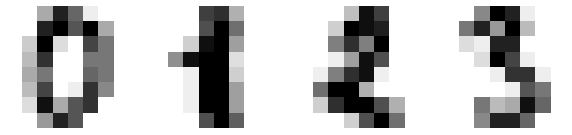

In [57]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")

Com estes dados em mãos, podemos fazer os cálculos de quais conjuntos de pixels e seus valores que mais contribuem para identificar os caracteres manuscritos. Com estes resultados, podemos montar a árvore de decisão e utilizá-la para classificar imagens de dígitos manuscritos inéditos com alguma acurácia.

Façamos o seguinte. Transformemos a imagem de 8x8 pixels em vetores de 64 pixels.

Depois façamos os cálculos da relevância dos pixels, assumindo que cada pixel é uma feature/propriedade dos dados, que contrubui para uma tomada de decisão (e.g. valor de referência do dígito, como informado por uma pessoa que os identificou quando da criação do conjunto de dados).

In [58]:
# Transforma imagem 8x8 em vetor com 64 posições
def image_to_vec(image):
    vec = []
    for line in range(8):
        vec.extend(image[line])
    return vec

vetores = []
for image in digits.images[:100]:
    vetores.append(image_to_vec(image))

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Calcula a árvore de decisão
tree = DecisionTreeClassifier()
tree.fit(vetores, digits.target[:100])

DecisionTreeClassifier()

Agora vamos imprimir a árvore

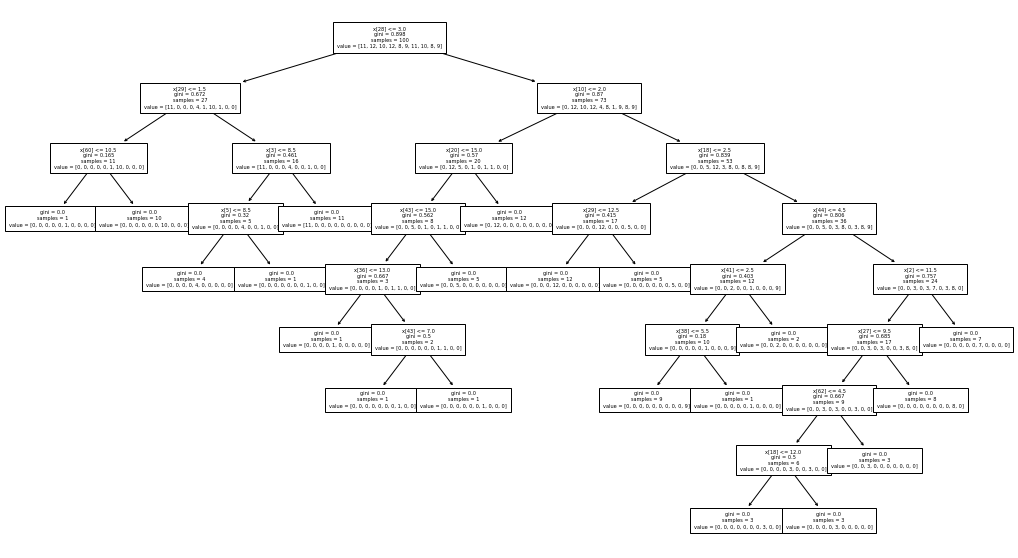

In [59]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))

_ = plot_tree(tree, ax=axes, fontsize=5)

A partir desta árvore, podemos tentar identificar outros caracteres inéditos.

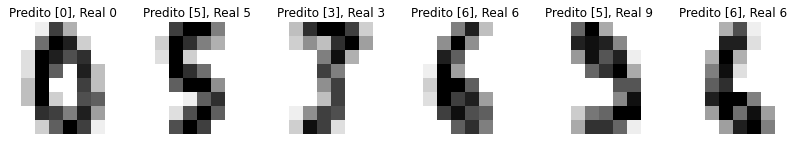

In [60]:
# Mostra 6 predições feitas a partir da árvore
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(14, 10))
for ax, image, label in zip(axes, digits.images[101:107], digits.target[101:107]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Predito {tree.predict([image_to_vec(image)])}, Real {label}")

Bem bacana.

Outra aplicação que usa estrutura de árvores é o padrão HTML, utilizado para montar sites.

#### HTML: o esqueleto das aplicações Web e documentos XML

Quem nunca viu o código fonte de um site não deve saber do que se trata e como se organiza.

Antes de mais nada, vamos capturar o código fonte de um site.

In [61]:
import requests

dados = requests.get("https://gnu.org")
print(dados.text[:500])

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="content-type" content="text/html; charset=utf-8" />
<link rel="author" href="mailto:webmasters@gnu.org" />
<link rel="icon" type="image/png" href="/graphics/gnu-head-mini.png" />
<meta name="ICBM" content="42.355469,-71.058627" />
<link rel="stylesheet" type="text/css" href="/mini.css" media="handheld" />
<link rel="stylesheet" type="text/css" href="/layout.min.css" media="screen" />
<lin


Voilà, temos o conteúdo do site em forma textual. Assim como baixado pelo navegador quando acessamos o mesmo site.

Note que o site é composto por blocos iniciados por `<tipo_bloco> </tipo_bloco>` ou `<tipo_bloco />`, enquanto `<!-- -->` são tratados como comentários.

Estes blocos, assim como no exemplo do sistema de arquivos, formam uma estrutura em árvore, que remontaremos a seguir.

In [62]:
class ArvoreHTML:
    def __init__(self):
        # Diretório de base (raíz) da árvore
        self.raiz = ElementoArvoreArquivos("/")

    def parse(self, corpo_html):
        self._parse_recursivo(self.raiz, corpo_html)

    # A cada recursão, partimos do início de um bloco até o seu fim
    def _parse_recursivo(self, no_atual: ElementoArvoreArquivos, corpo_html):
        while True:
            # Procura pelo primeiro <
            inicio_bloco = corpo_html.find('<')

            # Caso não hajam mais blocos, interrompe execução
            if inicio_bloco == -1 or corpo_html[inicio_bloco+1] == "/":
                return corpo_html

            # Checa se bloco é de comentário
            if corpo_html[inicio_bloco+1] == "!":
                if corpo_html[inicio_bloco+2:inicio_bloco+3] == "--":
                    # Se for, remove tudo até o primeiro --> que aparecer
                    final_bloco = corpo_html.find("-->")
                    corpo_html = corpo_html[final_bloco+1:]
                else:
                    # Se for um bloco de identificação do tipo de documento
                    final_bloco = corpo_html.find(">")
                    corpo_html = corpo_html[final_bloco+1:]
                # Procura o próximo bloco
                continue

            # Se chegou aqui, existe um bloco válido. Criamos uma entrada para ele
            # Em alguns casos o tipo de bloco será sucedido com espaço antes de ter propriedades e classes definidas
            fim_tipo_bloco = corpo_html[inicio_bloco:].find(' ')
            # Em outros, haverá apenas o término do bloco
            fim_tipo_bloco_alternativo = corpo_html[inicio_bloco:].find('>')
            # Procuramos a possiblidade mais curta e usamos ela
            fim_tipo_bloco = min(fim_tipo_bloco, fim_tipo_bloco_alternativo)

            # Extraímos o tipo do bloco
            tipo_bloco = corpo_html[inicio_bloco+1:inicio_bloco+fim_tipo_bloco]
            tipo_bloco = tipo_bloco.strip()

            # Criamos seu nó
            no_bloco = ElementoArvoreArquivos(tipo_bloco, pai=no_atual)
            no_atual.filhos.append(no_bloco)

            # Fim do bloco de abertura
            fim_abertura_bloco = corpo_html.find(">")

            # Final de bloco em linha, não tem recursão
            if corpo_html[fim_abertura_bloco-1] == "/":
                corpo_html = corpo_html[fim_abertura_bloco+1:]
                continue

            corpo_html = corpo_html[fim_abertura_bloco+1:]

            # Só saberemos de fato o fim do bloco atual após
            # processar os seus subelementos
            corpo_html = self._parse_recursivo(no_bloco, corpo_html)

            # Agora sim, podemos encontrar o bloco de terminação, que não seja em linha
            fim_tipo_bloco = f"</{tipo_bloco}>"
            fim_do_bloco = corpo_html.find(fim_tipo_bloco)
            corpo_html = corpo_html[fim_do_bloco+len(fim_tipo_bloco):]

class ImprimeArvoreHTML(print_tree):
    # Métodos necessários para imprimir a árvore print_tree
    def get_children(self, node):
        if type(node) == ArvoreHTML:
            node = node.raiz
        return node.filhos
    def get_node_str(self, node):
        if type(node) == ArvoreHTML:
            node = node.raiz
        return str(node.valor)

# Cria árvore e adiciona caminhos
arvore_html = ArvoreHTML()
arvore_html.parse(dados.text)

ImprimeArvoreHTML(arvore_html)


           ┌meta
           ├link
           ├link
           ├meta
           ├link
           ├link
           ├link
           ├title
           ├meta
           ├meta
           ├link
           ├style
           ├link
           ├link
           ├link
      ┌head┼link
      │    ├link
      │    ├link
      │    ├link
      │    ├link
      │    ├link
      │    ├link
      │    ├link
      │    ├link
      │    ├link
      │    ├link
      │    ├link
      │    ├meta
      │    ├link
      │    ├style
      │    └style
/─html┤
      │        ┌div─a─b
      │        │       ┌img
      │        │   ┌p─a┼img
      │        │   │   └span
      │        │   │   ┌p─a─span
      │        ├div┼div┼div
      │        │   │   └p─a─span
      │        │   │       ┌div─span
      │        │   └div─div┼span
      │        │           └span
      │        ├div
      │        │       ┌img
      │        │     ┌a┼strong
      │        │     │ └span
      │        │   ┌p┼br
      │        │   │ 

Navegadores da internet utilizam o mesmo tipo de `parsing` para remontar a árvore do documento.

O motor Blink, baseado no Webkit, e utilizado por navegadores baseados no Chromium implementa o parsing no seguinte arquivo: https://github.com/chromium/chromium/blob/main/third_party/blink/renderer/core/html/parser/html_document_parser.cc

A montagem da árvore HTML é feita no seguinte arquivo: https://github.com/chromium/chromium/blob/main/third_party/blink/renderer/core/html/parser/html_tree_builder.cc

#### Compressão de arquivos

A compressão de arquivos também pode utilizar árvores.

A codificação de Huffman, por exemplo, se utiliza da frequência dos caracteres para montar uma lista ordenada por frequência.

Em seguida, esta lista é transformada numa lista de nós de uma árvore binária.

Os dois nós de menor frequência se tornam filhos de um novo nó pai, que agrega a frequência de ambos os filhos.

Os nós filhos são removidos da lista ordenada, e o nó pai é inserido.

Repete-se o processo de remoção de um par de nós e agregação deles, até que haja apenas um nó na lista, que será o nó raiz.

Para mostrar isto, baixaremos o livro Romeu e Julieta, de William Shakespeare do site do projeto Gutenberg. https://www.gutenberg.org/ebooks/1513

In [63]:
import requests

texto_do_livro = requests.get("https://www.gutenberg.org/ebooks/1513.txt.utf-8").text
print(texto_do_livro[:100])

﻿The Project Gutenberg eBook of Romeo and Juliet, by William Shakespeare

This eBook is for the us


Em seguida, checaremos a frequência dos caracteres no texto.

In [64]:
frequencia_caracteres = {}
for char in texto_do_livro:
    if char not in frequencia_caracteres:
        frequencia_caracteres[char] = 0
    frequencia_caracteres[char] += 1

frequencia_caracteres = list(sorted(frequencia_caracteres.items(), key=lambda x: x[1]))

Podemos plotar as frequências em histogramas, para termos idéia de quão frequente são os caracteres.

) missing from current font.es/IPython/core/pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


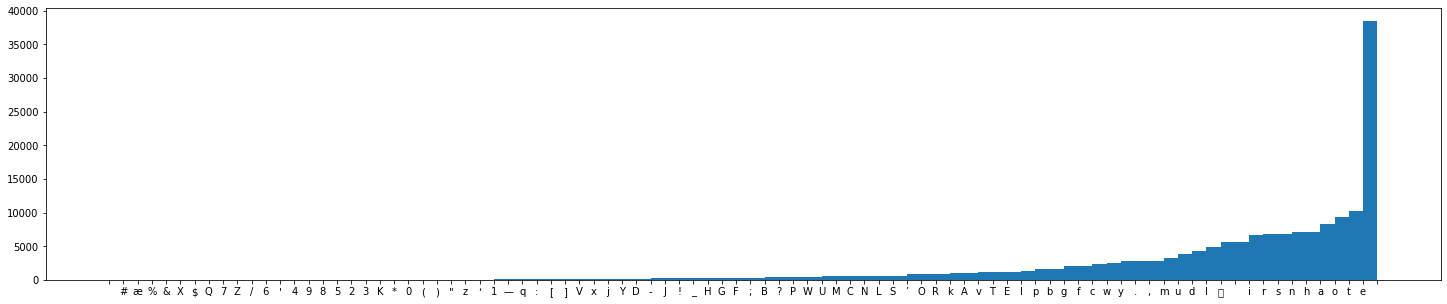

In [65]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(25,5))
lista = []
for x in frequencia_caracteres:
    lista.extend(x[0]*x[1])
plt.hist(lista, bins=[x[0] for x in frequencia_caracteres])
plt.show()
del x, fig, axes, lista

Com as frequências de aparição dos caracteres, podemos montar a nossa lista de nós ordenados por frequência.

In [66]:
class ElementoArvoreBinaria: # nó
    def __init__(self, valor, frequencia, pai=None, filho_esquerdo=None, filho_direito=None):
        self.valor = valor
        self.frequencia = frequencia
        self.pai = pai
        self.filho_esquerdo = filho_esquerdo
        self.filho_direito = filho_direito

# Transforma valores e frequencia dos caracteres em nós soltos
lista_nos = []
for (caractere, frequencia) in frequencia_caracteres:
    lista_nos.append(ElementoArvoreBinaria(valor=caractere, frequencia=frequencia))
del caractere, frequencia, frequencia_caracteres

Em seguida, removemos o par de nós com menor frequência, os agrupamos com um novo nó pai, que tem como frequência o somatório dos filhos. Após isto, readicionamos o nó pai na lista de nós.

In [67]:
# Enquanto houverem nós soltos, agrupa-os até sobrar apenas uma raiz
while len(lista_nos) > 1:
    no_esquerda = lista_nos[0]
    no_direita = lista_nos[1]
    no_pai = ElementoArvoreBinaria(valor=None,
                                   frequencia=no_esquerda.frequencia+no_direita.frequencia,
                                   filho_esquerdo=no_esquerda,
                                   filho_direito=no_direita)
    no_esquerda.pai = no_pai
    no_direita.pai = no_pai
    lista_nos.pop(0)
    lista_nos.pop(0)
    lista_nos.append(no_pai)
    lista_nos.sort(key=lambda x: x.frequencia)

# Ao final, resta apenas a raiz
raiz = lista_nos[0]
del lista_nos

Podemos então visualizar a nossa árvore de compressão e descompressão.

In [68]:
from print_tree import print_tree
class ImprimeArvoreFrequencias(print_tree):
    # Métodos necessários para imprimir a árvore print_tree
    def get_children(self, node):
        filhos = []
        # Pega filhos apenas se não forem nulos
        for filho in [node.filho_esquerdo, node.filho_direito]:
            if filho:
                filhos.append(filho)
        return filhos
    def get_node_str(self, node):
        return f"'{node.valor}':{node.frequencia}"

ImprimeArvoreFrequencias(raiz)


                                                                            ┌'b':1653
                                                                ┌'None':3337┤
                                                                │           │                                 ┌'D':183
                                                                │           │                      ┌'None':381┤
                                                                │           │                      │          └'-':198
                                                                │           │           ┌'None':817┤
                                                                │           │           │          └'P':436
                                                                │           └'None':1684┤
                                                                │                       └'’':867
                                                    ┌'None':7074┤
                       

Finalmente, devemos navegar a árvore para gerar os códigos de Huffman.

Faremos isto recursivamente. Quando navegarmos um filho esquerdo, adicionaremos um 0 ao final do código. Quando navegarmos para um filho direito, adicionaremos um 1 ao final do código.

In [69]:
codigosHuffman = {}
def montaCodigoHuffmanRecursivo(no, codigoparcial=[]):
    global codigosHuffman

    tem_filhos = False
    if no.filho_esquerdo:
        tem_filhos = True
        montaCodigoHuffmanRecursivo(no.filho_esquerdo, codigoparcial+[0])
    if no.filho_direito:
        tem_filhos = True
        montaCodigoHuffmanRecursivo(no.filho_direito, codigoparcial+[1])

    if not tem_filhos:
        codigosHuffman[no.valor] = codigoparcial
        pass

montaCodigoHuffmanRecursivo(raiz)

# Salva dicionário para permitir descompressão do arquivo
#import pickle
#with open("arvore_huffman.pickle", "wb") as f:
#    pickle.dump(raiz, f)

for chave in list(codigosHuffman.keys())[:10]:
    print("Caractere %s: código %s" % (chave, codigosHuffman[chave]))
del chave

Caractere b: código [0, 0, 0, 0, 0, 0]
Caractere D: código [0, 0, 0, 0, 0, 1, 0, 0, 0]
Caractere -: código [0, 0, 0, 0, 0, 1, 0, 0, 1]
Caractere P: código [0, 0, 0, 0, 0, 1, 0, 1]
Caractere ’: código [0, 0, 0, 0, 0, 1, 1]
Caractere O: código [0, 0, 0, 0, 1, 0, 0]
Caractere J: código [0, 0, 0, 0, 1, 0, 1, 0, 0]
Caractere 3: código [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]
Caractere K: código [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]
Caractere z: código [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1]


Em posse dos códigos, podemos traduzir o nosso texto original para um texto codificado.

In [70]:
texto_comprimido = []
for caractere in texto_do_livro:
    texto_comprimido.extend(codigosHuffman[caractere])
print("".join(map(str, texto_comprimido[:100])))

1000101010000101001100010001111010100000101110110101100010011111100110100111101011001001001000111111


Como transformaremos 0s e 1s em bytes para escrever, podem haver bits faltando para completar um ‘byte’ ao final. Adicionamos bits de padding.

In [71]:
# Se o tamanho do texto comprimido não for múltiplo de 8,
# insere padding (caracteres em branco)
modulo_de_8 = len(texto_comprimido) % 8
if modulo_de_8 != 0:
    texto_comprimido.extend([0]*(8-modulo_de_8))
del modulo_de_8

Agora transformamos cada conjunto de 8 bits num ‘byte’ para escrita.

Aviso: o código abaixo foi feito para facilitar a compreensão, e não para otimizar o desempenho a.k.a. é tosco e lento.

In [72]:
import struct
# Para cada 8 bits, transformamos em um ‘byte’
texto_comprimido_codificado = bytes()
potencias_2 = [2**(7-i) for i in range(8)]
texto_comprimido_original = texto_comprimido
while len(texto_comprimido) > 0:
    byte = texto_comprimido[:8]
    valor_byte = 0
    for i, bit in enumerate(byte):
        if bit:
            valor_byte += potencias_2[i]
    texto_comprimido = texto_comprimido[8:]
    texto_comprimido_codificado += struct.pack("B", valor_byte)

# Grava arquivo compactado
#with open("romeoejulieta.txt.compactado", "wb") as f:
#    f.write(texto_comprimido_codificado)

print("Tamanho original:", len(texto_do_livro))
print("Tamanho compactado:", len(texto_comprimido_codificado))

Tamanho original: 167331
Tamanho compactado: 102001


Para descompactar, utilizaremos o método inverso. Transformando bytes em bits, depois percorrendo a árvore para recuperar os valores dos caracteres correspondentes.

In [73]:
texto_comprimido = []
for byte in texto_comprimido_codificado:
    byte_extenso = []
    for i, pot in enumerate(potencias_2):
        if byte & pot > 0:
            byte_extenso.append(1)
        else:
            byte_extenso.append(0)
    texto_comprimido.extend(byte_extenso)
del byte_extenso, i, byte, pot, potencias_2

# Agora caminhamos pela árvore para descomprimir os símbolos
texto_descomprimido = ""
while len(texto_comprimido) > 0:
    no = raiz
    while len(texto_comprimido) > 0:
        # Vai para esquerda caso 0
        if texto_comprimido[0] == 0:
            no = no.filho_esquerdo
        # Vai para a direita caso 1
        else:
            no = no.filho_direito
        # Descarta bit
        texto_comprimido.pop(0)

        # Quando achar um nó folha, interrompe
        if no.valor is not None:
            texto_descomprimido += no.valor
            break

if texto_do_livro == texto_descomprimido:
    print("Compressão funcionando perfeitamente")

print(texto_do_livro[:100])
print(texto_descomprimido[:100])

Compressão funcionando perfeitamente
﻿The Project Gutenberg eBook of Romeo and Juliet, by William Shakespeare

This eBook is for the us
﻿The Project Gutenberg eBook of Romeo and Juliet, by William Shakespeare

This eBook is for the us


Mostramos assim, mais um caso de uso de árvores, desta vez para a compressão de arquivos sem perdas.

### Outros tipos de árvores

#### Maple tree

https://youtu.be/XwukyRAL7WQ

#### B-Tree e variantes

https://www.youtube.com/watch?v=4ELJDEjDpqk

#### Hitchhiker Tree

https://www.youtube.com/watch?v=jdn617M3-P4